In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
})
%matplotlib inline

In [9]:
tips = sns.load_dataset("tips")

# Bar plot

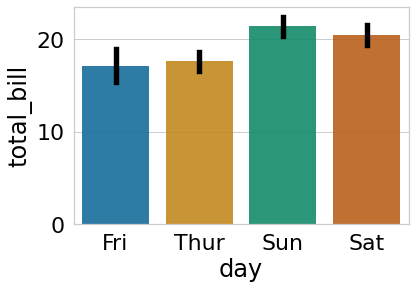

In [66]:
fig, ax = plt.subplots(facecolor="w")  # Add facecolor='w' so what `fig` shows in notebook
bar = sns.barplot(x="day", y="total_bill", data=tips, alpha=0.9, saturation=0.75, ci=68, errcolor=(0, 0, 0, 1.0), order=["Fri", "Thur", "Sun", "Sat"])  # ci=68 corresponds to 1 standard error
ax.set_axisbelow(True)  # Put grid line behind bars

## Add strip plot for showing empirical distribution

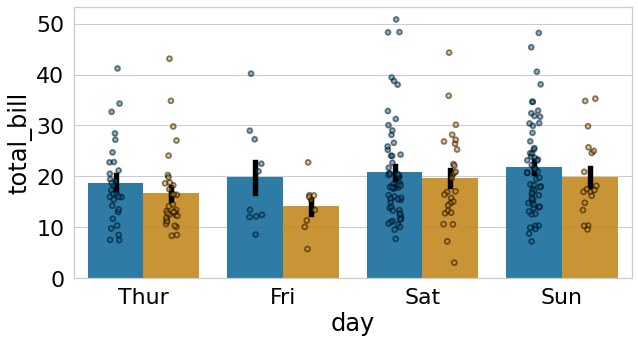

In [67]:
fig, ax = plt.subplots(facecolor="w", figsize=(10, 5))  # Add facecolor='w' so what `fig` shows in notebook
bar = sns.barplot(x="day", y="total_bill", data=tips, hue="sex", alpha=0.9, saturation=0.75, ci=68, errcolor=(0, 0, 0, 1))  # play around with alpha to not hide standard error bars
_ = sns.stripplot(x="day", y="total_bill", data=tips, hue="sex", ax=ax, alpha=0.5, dodge=True, edgecolor="black", linewidth=1.7)
ax.legend().remove()
ax.set_axisbelow(True)  # Put grid line behind bars

## Add significance testing

In [38]:
def get_corners(rectangle):
    b = rectangle
    w,h = b.get_width(), b.get_height()
    # lower left vertex
    x0, y0 = b.xy
    # lower right vertex
    x1, y1 = x0 + w, y0
    # top left vertex
    x2, y2 = x0, y0 + h
    # top right vertex
    x3, y3 = x0 + w, y0 + h
    return (x0,y0), (x1,y1), (x2,y2), (x3,y3)


def outline_bracket(left_bar, right_bar, spacing, height):
    l0, l1, l2, l3 = get_corners(left_bar)
    r0, r1, r2, r3 = get_corners(right_bar)
    
    # lower left
    b0 = ((l0[0] + l1[0]) / 2, max(l2[1], r2[1]) + spacing)
    # upper left
    b1 = (b0[0], max(l2[1] + spacing, r2[1] + spacing) + height)
    # upper right
    b2 = ((r0[0] + r1[0]) / 2, b1[1])
    # lower right
    b3 = (b2[0], b0[1])
    return b0, b1, b2, b3

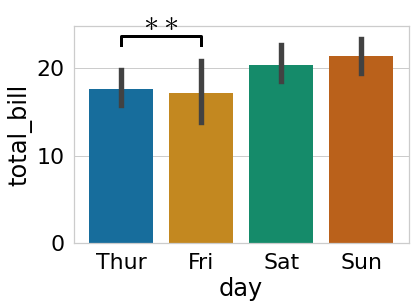

In [64]:
p_value = 0.001

fig, ax = plt.subplots(facecolor="w")  # Add facecolor='w' so what `fig` shows in notebook
bar = sns.barplot(x="day", y="total_bill", data=tips)


star = r"$**$" if p_value < 0.005 else r"$*$"
left_bar = bar.patches[0]
right_bar = bar.patches[1]
bracket = outline_bracket(left_bar, right_bar, spacing=5, height=1)
b_xs, b_ys = list(zip(*bracket))

ax.plot(b_xs, b_ys, c="k")
ax.text((b_xs[1] + b_xs[2]) / 2, b_ys[1] + 0.005, star, ha="center", va="bottom", color="k", fontsize=30)

ax.set_axisbelow(True)  # Put grid line behind bars

## Add white hatches

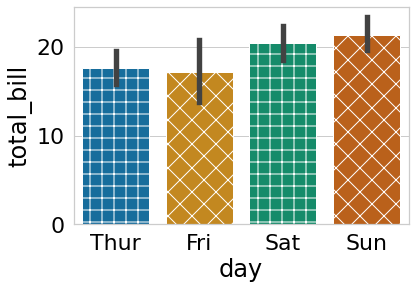

In [63]:
fig, ax = plt.subplots(facecolor="w")  # Add facecolor='w' so what `fig` shows in notebook
bar = sns.barplot(x="day", y="total_bill", data=tips)

hatches = ["+", "x"]
for i, b in enumerate(bar.patches):
    b.set_hatch(hatches[i % 2])
    b.set_edgecolor((1, 1, 1, 1.))
    
ax.set_axisbelow(True)  # Put grid line behind bars